In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
books=pd.read_csv(r"C:\Users\bkish\csv\books.csv")
rating=pd.read_csv(r"C:\Users\bkish\csv\ratings.csv")

In [15]:
books['features'] = books['Title'] + " " + books['Author'] + " " + books['Genre']
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books['features'])
content_similarity = cosine_similarity(tfidf_matrix)

In [16]:
book_index=0
similar_books=content_similarity[book_index].argsort()[::-1][1:4]
print("Content-Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]['Title'].tolist())

Content-Based Recommendations for 'Harry Potter':
['The Hobbit', 'Percy Jackson', 'Angels and Demons']


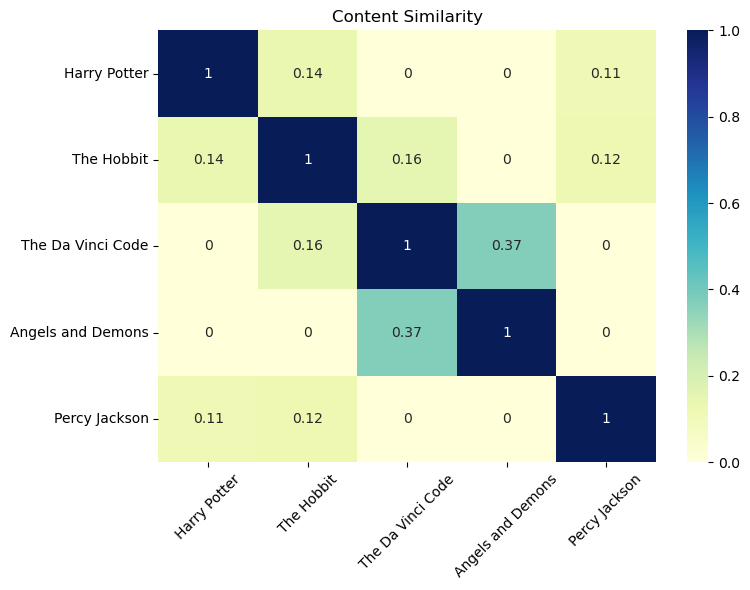

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(content_similarity, xticklabels=books['Title'],yticklabels=books['Title'],annot=True, cmap='YlGnBu')
plt.title('Content Similarity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:

# Collaborative Filtering: Create user-item matrix
user_item_matrix = rating.pivot_table(index='User_ID', columns='Book_ID', values='Rating').fillna(0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)

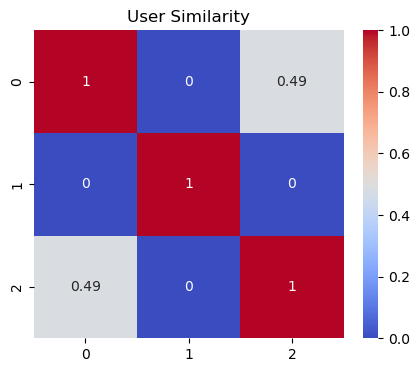

In [21]:

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [28]:
import numpy as np

# Create a DataFrame from the user similarity matrix
user_sim_df = pd.DataFrame(user_similarity,
                           index=user_item_matrix.index,
                           columns=user_item_matrix.index)

# Get users most similar to User 1 (excluding themselves)
similar_users = user_sim_df.loc[1].sort_values(ascending=False)[1:]

print("\nUsers most similar to User 1:")
print(similar_users)



Users most similar to User 1:
User_ID
3    0.487805
2    0.000000
Name: 1, dtype: float64


In [29]:
print(books.columns)
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores + 0.4 * aligned_ratings
top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i != book_index][:10]
print("\nHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

Index(['Book_ID', 'Title', 'Author', 'Genre', 'features'], dtype='object')

Hybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'Angels and Demons', 'The Da Vinci Code']
